Homework week 10 DS-002

In [59]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
import random
import statsmodels.api as sm

from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns12
matplotlib.rcParams['text.color'] = 'k'

In [60]:
#pip install prophet

In [61]:
#pip install fbprophet

In [4]:
pip install neuralprophet


  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.30
    Uninstalling holidays-0.30:
      Successfully uninstalled holidays-0.30


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.4 requires holidays>=0.25, but you have holidays 0.21.13 which is incompatible.


In [62]:
from prophet import Prophet
from neuralprophet import NeuralProphet

In [64]:
#pip install facebook-prophet neural-prophet

In [63]:
#pip install fbprophet neural-prophet

In [168]:
df = pd.read_csv('wiki_machine_learning.csv',sep=' ')

In [169]:
df.head(10)

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
76,2015-01-06,2327,en,Machine_learning,8708,201501,Machine_learning
75,2015-01-07,2469,en,Machine_learning,8708,201501,Machine_learning
74,2015-01-08,2349,en,Machine_learning,8708,201501,Machine_learning
73,2015-01-09,2279,en,Machine_learning,8708,201501,Machine_learning
63,2015-01-10,1600,en,Machine_learning,8708,201501,Machine_learning


In [170]:
df['date'].min(), df['date'].max()

('2015-01-01', '2016-01-20')

In [171]:
df['date'] = pd.to_datetime(df['date']).dt.strftime("%d/%m/%y")
#df.drop(columns=['date'],inplace=True)

In [172]:
data=pd.DataFrame()
data['date']=pd.date_range(start = '2015-01-01', end = '2016-01-20')
data['date'] = data['date'].dt.strftime("%d/%m/%y")
data=data.merge(df, how = 'left', on = 'date')

In [173]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [54]:
#df['date'] = pd.to_datetime(df['date'])

In [80]:
#pip install fbprophet

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    385 non-null    object 
 1   count   384 non-null    float64
 2   lang    384 non-null    object 
 3   page    384 non-null    object 
 4   rank    384 non-null    float64
 5   month   384 non-null    float64
 6   title   384 non-null    object 
dtypes: float64(3), object(4)
memory usage: 24.1+ KB


In [176]:
numeric_cols = ['count', 'rank']
for n_col in numeric_cols:
    data[n_col]=data[n_col].interpolate(method='cubic')

In [177]:
data= data[data['count'] != 0]

In [104]:
# mean_value = data['count'].mean()
# data['count'].fillna(mean_value, inplace=True)

In [178]:
a = sm.tsa.seasonal_decompose(data['count'], period=30, model='additive')

In [179]:
m = sm.tsa.seasonal_decompose(data['count'], period = 30, model = 'multiplicative')

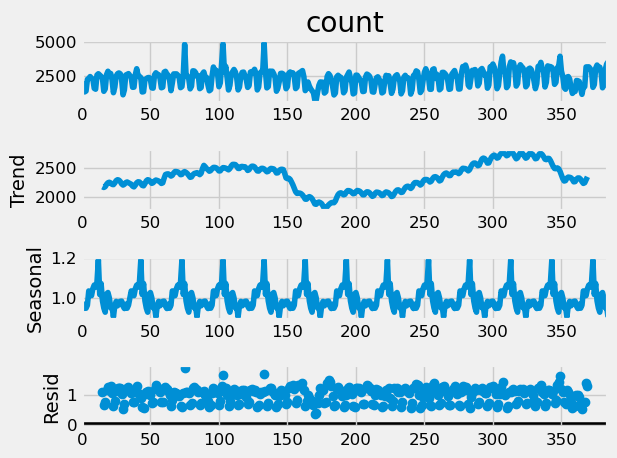

In [180]:
fig=m.plot()

In [181]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def st_check(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)' % key] = value
    print(dfoutput)


st_check(data['count'])


Test statistic                  -3.303585
p-value                          0.014719
#Lags used                      15.000000
Number of Observations Used    368.000000
Critical Value(1%)              -3.448245
Critical Value(5%)              -2.869426
Critical Value(10%)             -2.570971
dtype: float64


In [182]:
print(len(data['count']))  

384


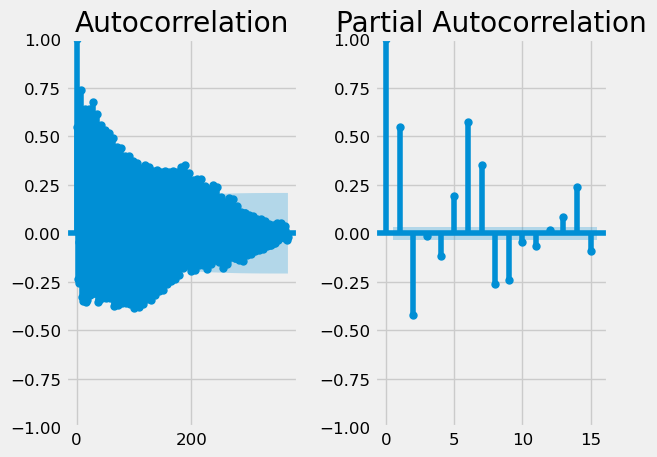

In [183]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt

l = (1, 2)
a = plt.subplot2grid(l, (0, 0))
p = plt.subplot2grid(l, (0, 1))

smt.plot_acf(data['count'], lags=368, ax=a, alpha=0.5)
smt.plot_pacf(data['count'], lags=15, ax=p, alpha=0.5)

plt.tight_layout()
plt.show()


In [184]:
model_df = data.loc[:, ['date', 'count']].rename(columns={"date": "ds", "count": "y"})
model_df.head()

,ds,y
0,01/01/15,1414.0
1,02/01/15,1920.0
2,03/01/15,1338.0
3,04/01/15,1404.0
4,05/01/15,2264.0


In [185]:
model = Prophet(daily_seasonality=True, interval_width=0.95)
model.fit(model_df)

17:53:16 - cmdstanpy - INFO - Chain [1] start processing
17:53:17 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
ft = model.make_future_dataframe(periods = 30)
pred = model.predict(ft)
pred[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
409,2016-12-27,2880.794140,1820.866010,3975.133522
410,2016-12-28,2903.841722,1854.111029,3975.563739
411,2016-12-29,2746.760054,1701.367429,3764.972118
412,2016-12-30,2658.674748,1596.661403,3896.069120
413,2016-12-31,1966.226427,880.283206,3067.362939


In [187]:
model = Prophet()
model.fit(model_df)

future = model.make_future_dataframe(periods=30)  

forecast = model.predict(future)

forecast_30_days = forecast[['ds', 'yhat']][-30:]

forecast_30_days

17:53:23 - cmdstanpy - INFO - Chain [1] start processing
17:53:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
384,2016-12-02,2651.053394
385,2016-12-03,1958.695690
386,2016-12-04,2211.665575
387,2016-12-05,2808.520747
388,2016-12-06,2876.686056
389,2016-12-07,2899.852491
390,2016-12-08,2742.582532
391,2016-12-09,2654.641304
392,2016-12-10,1962.283599
393,2016-12-11,2215.253484


In [188]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2234.023380,1647.415432,3094.548649,2234.023380,2234.023380,148.322502,148.322502,148.322502,148.322502,148.322502,148.322502,0.0,0.0,0.0,2382.345882
1,2015-01-02,2234.524937,1577.846593,2983.515490,2234.524937,2234.524937,59.868715,59.868715,59.868715,59.868715,59.868715,59.868715,0.0,0.0,0.0,2294.393652
2,2015-01-03,2235.026494,820.389324,2308.187204,2235.026494,2235.026494,-633.001548,-633.001548,-633.001548,-633.001548,-633.001548,-633.001548,0.0,0.0,0.0,1602.024945
3,2015-01-04,2235.528051,1090.658903,2572.792507,2235.528051,2235.528051,-380.544222,-380.544222,-380.544222,-380.544222,-380.544222,-380.544222,0.0,0.0,0.0,1854.983829
4,2015-01-05,2236.029608,1724.534825,3155.755481,2236.029608,2236.029608,215.798392,215.798392,215.798392,215.798392,215.798392,215.798392,0.0,0.0,0.0,2451.827999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2016-12-27,2603.998641,2175.794674,3622.594933,2603.991526,2604.006602,283.451143,283.451143,283.451143,283.451143,283.451143,283.451143,0.0,0.0,0.0,2887.449784
410,2016-12-28,2604.511200,2170.093579,3630.390404,2604.503189,2604.519792,306.105019,306.105019,306.105019,306.105019,306.105019,306.105019,0.0,0.0,0.0,2910.616219
411,2016-12-29,2605.023758,2008.293403,3462.954268,2605.014906,2605.033024,148.322502,148.322502,148.322502,148.322502,148.322502,148.322502,0.0,0.0,0.0,2753.346260
412,2016-12-30,2605.536317,1977.773652,3345.909150,2605.527073,2605.546408,59.868715,59.868715,59.868715,59.868715,59.868715,59.868715,0.0,0.0,0.0,2665.405032


Text(0.5, 1.0, 'Wikipedia counter')

<Figure size 1600x800 with 0 Axes>

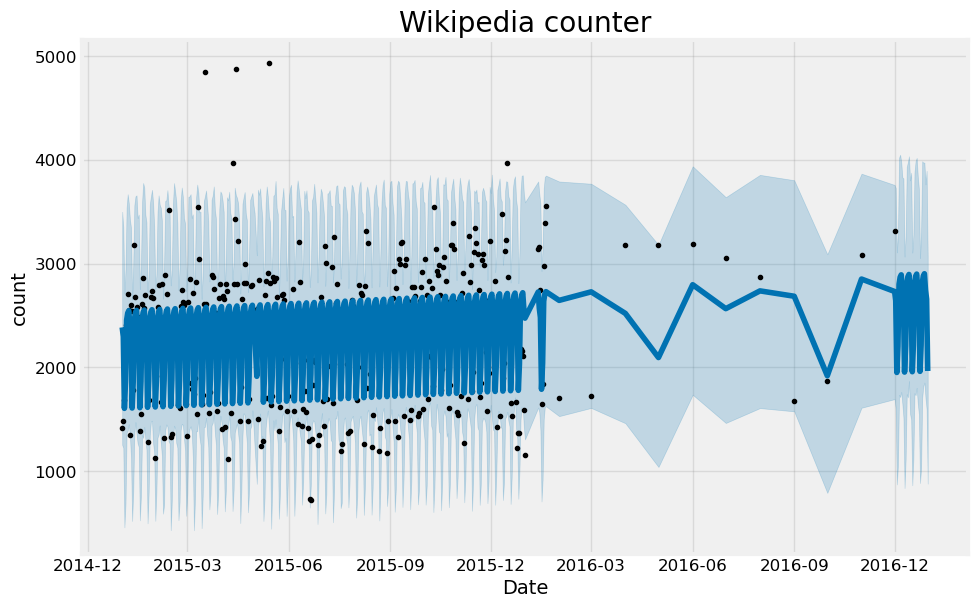

In [189]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel = 'Date',ylabel = 'count')
plt.title('Wikipedia counter')